In [ ]:
%%local
%matplotlib inline

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length
from pyspark.sql.functions import col, count, when
spark = SparkSession.builder.appName("MyApp").getOrCreate()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1701468827272_0004,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Replace 'path/to/your/csvfile.csv' with the path to your CSV file
csv_file_path = 's3://msba2024-emr-integration1/cleaned_Books_rating.csv'
# Read the CSV file into a DataFrame
df_rating = spark.read.csv(csv_file_path, header=True, inferSchema=True)
# Show the DataFrame
df_rating.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|        Id|               Title|       User_id|         profileName|Score|      Time|        review_Title|         review_Text|n_helpful_review|n_views|
+----------+--------------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|1882931173|Its Only Art If I...| AVCGYZL8FQQTD|"Jim of Oz ""jim-...|  4.0|1999-10-23|Nice collection o...|This is only for ...|               7|      7|
|0826414346|Dr. Seuss: Americ...|A30TK6U7DNS82R|       Kevin Killian|  5.0|2004-09-21|   Really Enjoyed It|I don't care much...|              10|     10|
|0826414346|Dr. Seuss: Americ...|A3UH4UZ4RSVO82|        John Granger|  5.0|2004-03-09|Essential for eve...|"If people become...|              10|     11|
|0826414346|Dr. Seuss: Americ...|A2MVUWT453QH61|"Roy E. Perry ""a...|  4.0|2

In [ ]:
# Create a "output" folder in S3 before running the code below
df_rating.write.option("path", "s3://msba2024-emr-integration1/rating")\
    .mode("overwrite")\
    .saveAsTable("rating")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
spark.sql("SELECT * FROM rating").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|        Id|            Title|       User_id|         profileName|Score|      Time|        review_Title|         review_Text|n_helpful_review|n_views|
+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|B000PX9DUU|Old Man & the Sea| A17N23WXA7EAF|"C. Colt ""It Jus...|  5.0|2000-07-17|Possibly his best...|&quot;The Old Man...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A2WR2YJ0N95G5X|                Mike|  5.0|2000-06-07|A story with meaning|This is my second...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A1UEAAODS7TAU5|        G. MCPHERSON|  3.0|2000-06-05|new to hemingway ...|if you are new to...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A3NJRF10KWIAVF|     Shoshana Carter|  3.0|2000-02-20|Excellent U

In [ ]:
# Assuming you have a SparkSession instance named 'spark'
# Query to select rows from the year 2000
query = """
SELECT *
FROM rating
WHERE YEAR(Time) = 2000
"""

# Executing the query
df_2000 = spark.sql(query)

# Show the results
df_2000.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|        Id|            Title|       User_id|         profileName|Score|      Time|        review_Title|         review_Text|n_helpful_review|n_views|
+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|B000PX9DUU|Old Man & the Sea| A17N23WXA7EAF|"C. Colt ""It Jus...|  5.0|2000-07-17|Possibly his best...|&quot;The Old Man...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A2WR2YJ0N95G5X|                Mike|  5.0|2000-06-07|A story with meaning|This is my second...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A1UEAAODS7TAU5|        G. MCPHERSON|  3.0|2000-06-05|new to hemingway ...|if you are new to...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A3NJRF10KWIAVF|     Shoshana Carter|  3.0|2000-02-20|Excellent U

In [ ]:
df_rating.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- Score: double (nullable = true)
 |-- Time: date (nullable = true)
 |-- review_Title: string (nullable = true)
 |-- review_Text: string (nullable = true)
 |-- n_helpful_review: integer (nullable = true)
 |-- n_views: integer (nullable = true)

In [ ]:
# Replace 'path/to/your/csvfile.csv' with the path to your CSV file
csv_file_path2 = 's3://msba2024-emr-integration1/cleaned_Books_data (1).csv'
# Read the CSV file into a DataFrame
df_data = spark.read.csv(csv_file_path2, header=True, inferSchema=True)
# Show the DataFrame
df_data.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+
|               Title|         description|             authors|               image|         previewLink|           publisher|publishedDate|            infoLink|          categories|ratingsCount|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+
|Its Only Art If I...|                null|    ['Julie Strain']|http://books.goog...|http://books.goog...|     Arkive Editions|         1996|http://books.goog...|['Comics & Graphi...|           0|
|Wonderful Worship...|This resource inc...|    ['David R. Ray']|http://books.goog...|http://books.goog...|       Spinsters Ink|         2000|http://books.goog...|        ['Religion']|           0|
|Whispers of th

In [ ]:
df_rating.write.option("path", "s3://msba2024-emr-integration1/data")\
    .mode("overwrite")\
    .saveAsTable("data")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
spark.sql("SELECT * FROM data").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|        Id|            Title|       User_id|         profileName|Score|      Time|        review_Title|         review_Text|n_helpful_review|n_views|
+----------+-----------------+--------------+--------------------+-----+----------+--------------------+--------------------+----------------+-------+
|B000PX9DUU|Old Man & the Sea| A17N23WXA7EAF|"C. Colt ""It Jus...|  5.0|2000-07-17|Possibly his best...|&quot;The Old Man...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A2WR2YJ0N95G5X|                Mike|  5.0|2000-06-07|A story with meaning|This is my second...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A1UEAAODS7TAU5|        G. MCPHERSON|  3.0|2000-06-05|new to hemingway ...|if you are new to...|               1|      2|
|B000PX9DUU|Old Man & the Sea|A3NJRF10KWIAVF|     Shoshana Carter|  3.0|2000-02-20|Excellent U

In [ ]:
spark.sql("DESCRIBE data").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+---------+-------+
|        col_name|data_type|comment|
+----------------+---------+-------+
|              Id|   string|   null|
|           Title|   string|   null|
|         User_id|   string|   null|
|     profileName|   string|   null|
|           Score|   double|   null|
|            Time|     date|   null|
|    review_Title|   string|   null|
|     review_Text|   string|   null|
|n_helpful_review|      int|   null|
|         n_views|      int|   null|
+----------------+---------+-------+

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Select distinct authors and add a unique ID
authors_df = df_data.select("authors").withColumn("AuthorID", monotonically_increasing_id())

# Save to S3
authors_df.write.mode("overwrite").option("path", "s3://msba2024-emr-integration1/Authors").saveAsTable("Authors")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Select distinct publishers and add a unique ID
publishers_df = df_data.select("publisher").withColumn("PublisherID", monotonically_increasing_id())

# Save to S3
publishers_df.write.mode("overwrite").option("path", "s3://msba2024-emr-integration1/Publishers").saveAsTable("Publishers")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Select distinct categories and add a unique ID
categories_df = df_data.select("categories").withColumn("CategoriesID", monotonically_increasing_id())

# Save to S3
categories_df.write.mode("overwrite").option("path", "s3://msba2024-emr-integration1/Categories").saveAsTable("Categories")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Assuming 'df_data' is your DataFrame
books_df = df_data.selectExpr("Title",
                              "authors",
                              "publisher",
                              "categories",
                              "description AS Description",
                              "image AS Image",
                              "previewLink AS PreviewLink",
                              "publishedDate AS PublishedDate",
                              "infoLink AS InfoLink",
                              "cast(ratingsCount as int) AS RatingsCount")

# Assuming you have the logic to add AuthorID, PublisherID, and CategoriesID
# For example, this could be a join operation with the respective tables
# books_df = books_df.join(authors_df, ...)
# books_df = books_df.join(publishers_df, ...)
# books_df = books_df.join(categories_df, ...)
books_df.write.mode("overwrite").option("path", "s3://msba2024-emr-integration1/Books").saveAsTable("Books")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Assuming 'persistent_table' is your DataFrame
# Adding a 'ReviewID' column to mimic an auto-incrementing primary key
reviews_ratings_df = df_rating.withColumn("ReviewID", monotonically_increasing_id()) \
                                     .selectExpr("ReviewID",
                                                 "Title",
                                                 "User_id as UserID",
                                                 "Score",
                                                 "Time",
                                                 "review_Title as ReviewTitle",
                                                 "review_Text as ReviewText",
                                                 "n_helpful_review as NHelpfulReview",
                                                 "n_views as NViews")
reviews_ratings_df.write.mode("overwrite").option("path", "s3://msba2024-emr-integration1/reviews_rating").saveAsTable("reviews_rating")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
spark.sql("SELECT * FROM Authors").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------+
|             authors|AuthorID|
+--------------------+--------+
|    ['Julie Strain']|       0|
|    ['David R. Ray']|       1|
| ['Veronica Haddon']|       2|
|['Everett Ferguson']|       3|
|['Mary Fabyan Win...|       4|
|  ['Steven Wardell']|       5|
|['Camillia Fawzi ...|       6|
|['Armando Salda A...|       7|
|['Evelyn B. Chris...|       8|
|      ['Frank Owen']|       9|
|     ['Barry Crump']|      10|
|    ['Fiona Cownie']|      11|
|['Kenneth H. Coop...|      12|
|     ['Robert Kane']|      13|
|['Dorling Kinders...|      14|
|     ['Howard Hill']|      15|
| ['Arthur J. Droge']|      16|
|   ['Donald Laming']|      17|
|['Steve Richardson']|      18|
|     ['Rupert Fike']|      19|
+--------------------+--------+
only showing top 20 rows

In [ ]:
spark.sql("SELECT * FROM Publishers").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+
|           publisher|PublisherID|
+--------------------+-----------+
|     Arkive Editions|          0|
|       Spinsters Ink|          1|
|           iUniverse|          2|
|Wm. B. Eerdmans P...|          3|
|     Tan Books & Pub|          4|
|  Plympton PressIntl|          5|
|    Berg Pub Limited|          6|
|Relax into Your S...|          7|
|            Sky Pony|          8|
|Pickle Partners P...|          9|
|Pocket Naturalist...|         10|
|Bloomsbury Publis...|         11|
|              Bantam|         12|
|             OUP USA|         13|
|New York, N.Y. : ...|         14|
|     Derrydale Press|         15|
|        Mohr Siebeck|         16|
|   John Wiley & Sons|         17|
|  Simon and Schuster|         18|
|Book Publishing C...|         19|
+--------------------+-----------+
only showing top 20 rows

In [ ]:
spark.sql("SELECT * FROM Categories").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|          categories|CategoriesID|
+--------------------+------------+
|['Comics & Graphi...|           0|
|        ['Religion']|           1|
|         ['Fiction']|           2|
|        ['Religion']|           3|
|['Biography & Aut...|           4|
|  ['Social Science']|           5|
|        ['Religion']|           6|
|       ['Reference']|           7|
|['Juvenile Nonfic...|           8|
|         ['History']|           9|
|['New Zealand fic...|          10|
|             ['Law']|          11|
|['Health & Fitness']|          12|
|      ['Philosophy']|          13|
|          ['Europe']|          14|
|['Sports & Recrea...|          15|
|        ['Religion']|          16|
|      ['Psychology']|          17|
|['Sports & Recrea...|          18|
|['Biography & Aut...|          19|
+--------------------+------------+
only showing top 20 rows

In [ ]:
spark.sql("SELECT * FROM Books").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------+
|               Title|             authors|           publisher|          categories|         Description|               Image|         PreviewLink|PublishedDate|            InfoLink|RatingsCount|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------+
|Its Only Art If I...|    ['Julie Strain']|     Arkive Editions|['Comics & Graphi...|                null|http://books.goog...|http://books.goog...|         1996|http://books.goog...|           0|
|Wonderful Worship...|    ['David R. Ray']|       Spinsters Ink|        ['Religion']|This resource inc...|http://books.goog...|http://books.goog...|         2000|http://books.goog...|           0|
|Whispers of th

In [ ]:
spark.sql("SELECT * FROM reviews_rating").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+--------------+-----+----------+--------------------+--------------------+--------------+------+
|   ReviewID|            Title|        UserID|Score|      Time|         ReviewTitle|          ReviewText|NHelpfulReview|NViews|
+-----------+-----------------+--------------+-----+----------+--------------------+--------------------+--------------+------+
|42949672960|Old Man & the Sea| A17N23WXA7EAF|  5.0|2000-07-17|Possibly his best...|&quot;The Old Man...|             1|     2|
|42949672961|Old Man & the Sea|A2WR2YJ0N95G5X|  5.0|2000-06-07|A story with meaning|This is my second...|             1|     2|
|42949672962|Old Man & the Sea|A1UEAAODS7TAU5|  3.0|2000-06-05|new to hemingway ...|if you are new to...|             1|     2|
|42949672963|Old Man & the Sea|A3NJRF10KWIAVF|  3.0|2000-02-20|Excellent Use of ...|Hemmingway demons...|             1|     2|
|42949672964|Old Man & the Sea| AUWKMVQ7I6KXQ|  4.0|1999-12-20|Classic Reading, ...|The Old Man and t...

In [ ]:
# Business insights and queries

# 1
# Books with Most Helpful Reviews
# Find books with the highest number of helpful reviews.

spark.sql("""
    SELECT B.Title, SUM(RR.NHelpfulReview) as TotalHelpfulReviews
    FROM Books B JOIN reviews_rating RR ON B.Title = RR.Title
    GROUP BY B.Title
    ORDER BY TotalHelpfulReviews DESC
    LIMIT 10
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+
|               Title|TotalHelpfulReviews|
+--------------------+-------------------+
|   Mere Christianity|              43624|
| Pride and Prejudice|              42598|
|          The Hobbit|              24527|
|  Rich Dad, Poor Dad|              22648|
|An inquiry into t...|              19617|
|How to Talk to a ...|              18179|
|Liberal Fascism: ...|              17033|
|THE BOOK OF MORMO...|              16857|
|     Brave New World|              15862|
|Confessions of an...|              15613|
+--------------------+-------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

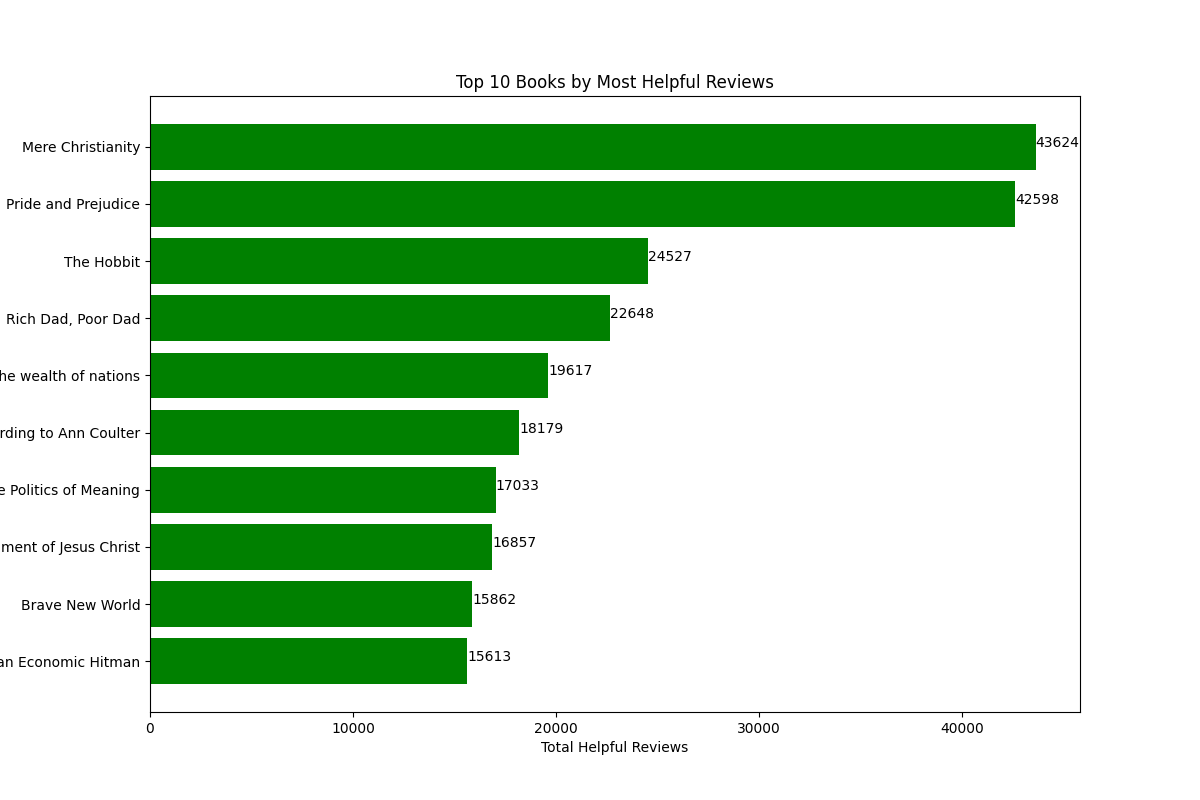

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_books_reviews' is the Spark DataFrame containing the result of your SQL query
df_books_reviews = spark.sql("""
SELECT B.Title, SUM(RR.NHelpfulReview) as TotalHelpfulReviews
FROM Books B JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Title
ORDER BY TotalHelpfulReviews DESC
LIMIT 10
""")

# Convert the DataFrame to Pandas for visualization
pandas_books_reviews = df_books_reviews.toPandas()

# Sorting the DataFrame by 'TotalHelpfulReviews' for better visualization
pandas_books_reviews.sort_values('TotalHelpfulReviews', inplace=True, ascending=True)

# Plotting
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
plt.barh(pandas_books_reviews['Title'], pandas_books_reviews['TotalHelpfulReviews'], color='green')

# Add labels and title
plt.xlabel('Total Helpful Reviews')
plt.ylabel('Book Title')
plt.title('Top 10 Books by Most Helpful Reviews')

# Display the values on the bars for clarity
for index, value in enumerate(pandas_books_reviews['TotalHelpfulReviews']):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

%matplot plt


In [ ]:
# 2
# User Engagement Analysis
# Analyze how user engagement (views and helpful reviews) changes over time.

spark.sql("""
    SELECT YEAR(RR.Time) as Year, SUM(RR.NViews) as TotalViews, SUM(RR.NHelpfulReview) as TotalHelpfulReviews
    FROM reviews_rating RR
    GROUP BY Year
    ORDER BY Year;
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+----------+-------------------+
|Year|TotalViews|TotalHelpfulReviews|
+----+----------+-------------------+
|1969|       144|                117|
|1996|        73|                 62|
|1997|     37614|              29957|
|1998|    189700|             151582|
|1999|    555785|             424483|
|2000|   1955449|            1516935|
|2001|   1498377|            1146822|
|2002|   1377807|            1029869|
|2003|   1406241|            1044377|
|2004|   1922556|            1342568|
|2005|   2271529|            1559073|
|2006|   1789789|            1220127|
|2007|    989382|             659312|
|2008|    644782|             410322|
|2009|    565389|             346336|
|2010|    521829|             327684|
|2011|    403802|             234823|
|2012|    269606|             149867|
|2013|     29898|              16527|
+----+----------+-------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

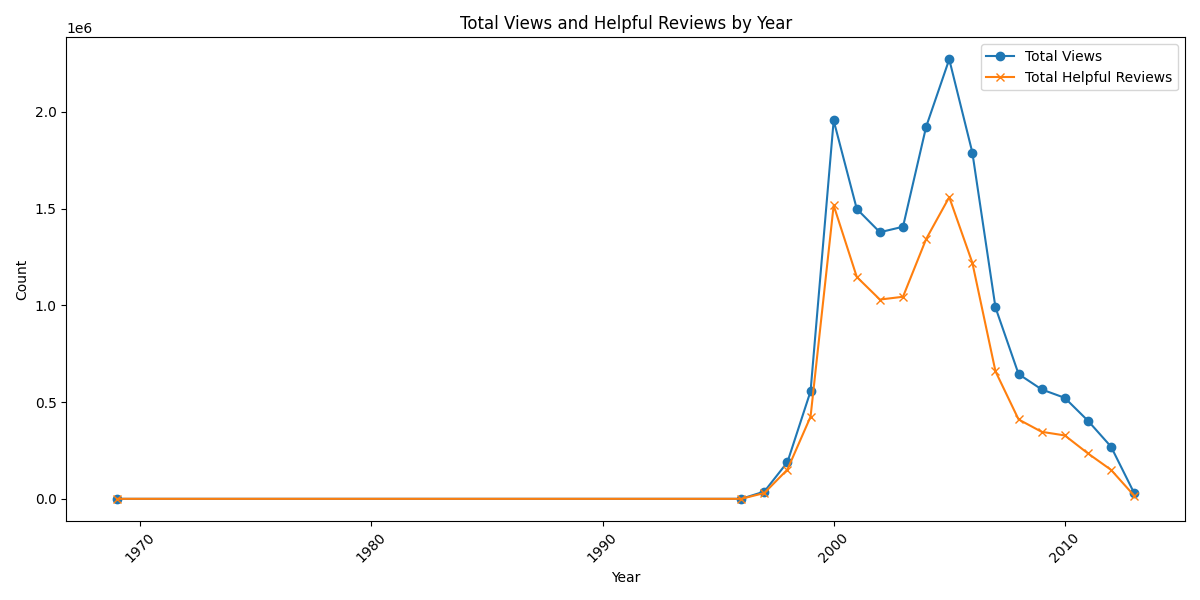

In [ ]:
import matplotlib.pyplot as plt

# Run SQL query to aggregate data by year
agg_query = """
SELECT YEAR(Time) as Year, SUM(NViews) as TotalViews, SUM(NHelpfulReview) as TotalHelpfulReviews
FROM reviews_rating
GROUP BY YEAR(Time)
ORDER BY YEAR(Time)
"""
df_yearly_aggregated = spark.sql(agg_query)

# Convert the aggregated Spark DataFrame to a Pandas DataFrame for plotting
pandas_aggregated = df_yearly_aggregated.toPandas()

# Plotting
plt.figure(figsize=(12, 6))

# Plot TotalViews
plt.plot(pandas_aggregated['Year'], pandas_aggregated['TotalViews'], label='Total Views', marker='o')

# Plot TotalHelpfulReviews
plt.plot(pandas_aggregated['Year'], pandas_aggregated['TotalHelpfulReviews'], label='Total Helpful Reviews', marker='x')

# Adding title and labels
plt.title('Total Views and Helpful Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping

plt.show()

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

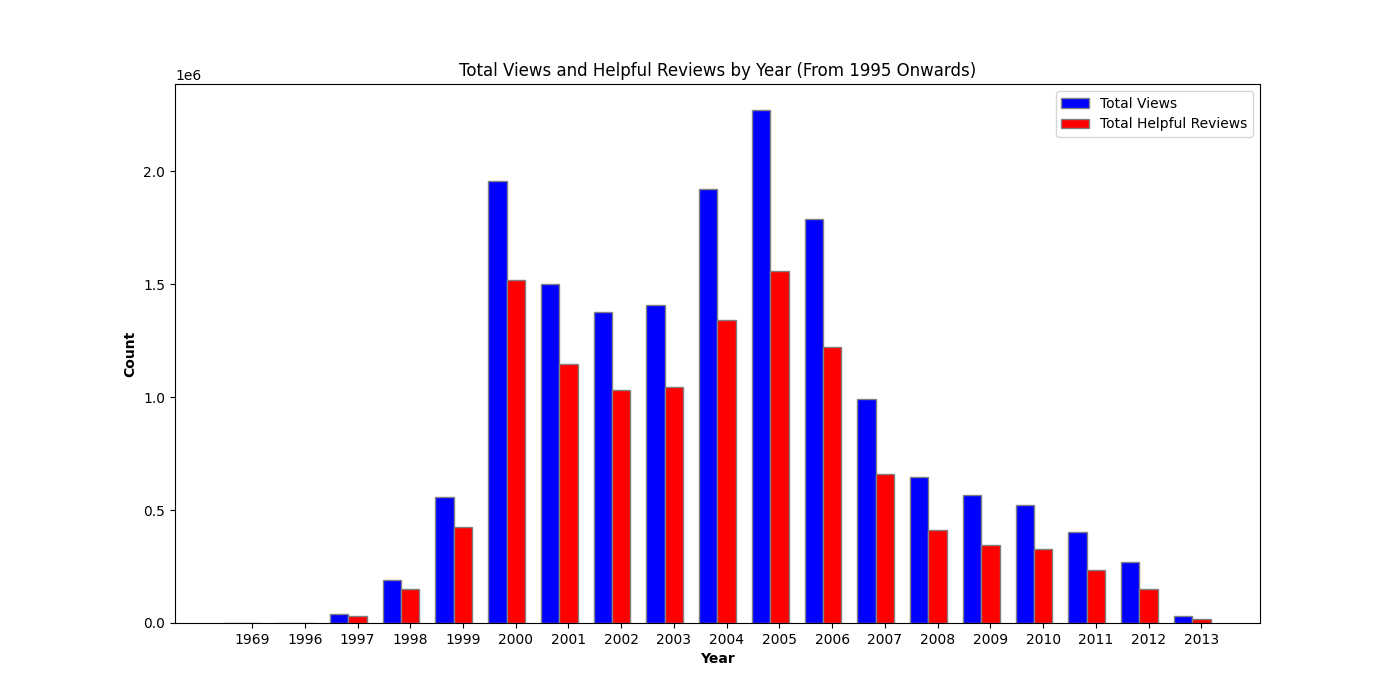

In [ ]:
import matplotlib.pyplot as plt

# Run SQL query to aggregate data by year for years after 1995
agg_query = """
SELECT YEAR(Time) as Year, SUM(NViews) as TotalViews, SUM(NHelpfulReview) as TotalHelpfulReviews
FROM reviews_rating
GROUP BY YEAR(Time)
ORDER BY YEAR(Time)
"""
df_yearly_aggregated = spark.sql(agg_query)

# Convert the aggregated Spark DataFrame to a Pandas DataFrame for plotting
pandas_aggregated = df_yearly_aggregated.toPandas()

# Plotting
plt.figure(figsize=(14, 7))

# Creating bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(pandas_aggregated['Year']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, pandas_aggregated['TotalViews'], color='blue', width=bar_width, edgecolor='grey', label='Total Views')
plt.bar(r2, pandas_aggregated['TotalHelpfulReviews'], color='red', width=bar_width, edgecolor='grey', label='Total Helpful Reviews')

# Adding title and labels
plt.title('Total Views and Helpful Reviews by Year (From 1995 Onwards)')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(pandas_aggregated['Year']))], pandas_aggregated['Year'])

# Create legend & Show graphic
plt.legend()
plt.show()
%matplot plt


In [ ]:
# 3
# New vs. Old Books Comparison
# Compare the average ratings of new books (e.g., published in the last 5 years) versus older books.

spark.sql("""
SELECT
    CASE
        WHEN YEAR(B.PublishedDate) >= YEAR(CURDATE()) - 5 THEN 'New Books'
        ELSE 'Old Books'
    END as BookType,
    AVG(RR.Score) as AvgScore
FROM Books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY BookType;
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----------------+
| BookType|         AvgScore|
+---------+-----------------+
|Old Books|4.228405977745751|
|New Books|4.261897723913686|
+---------+-----------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

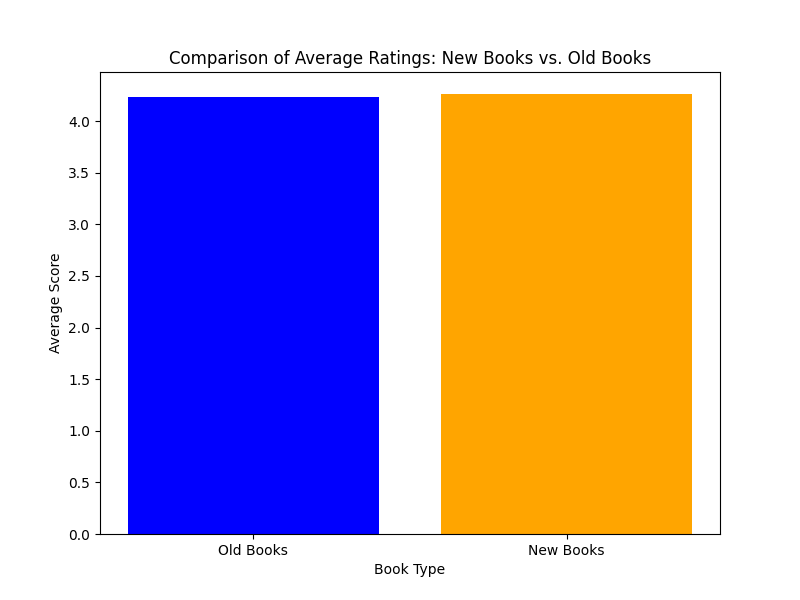

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_book_type_scores' is the Spark DataFrame containing the result of your SQL query
df_book_type_scores = spark.sql("""
SELECT CASE
         WHEN YEAR(B.PublishedDate) >= YEAR(CURDATE()) - 5 THEN 'New Books'
         ELSE 'Old Books'
       END as BookType,
       AVG(RR.Score) as AvgScore
FROM Books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY BookType
""")

# Convert the DataFrame to Pandas for visualization
pandas_book_type_scores = df_book_type_scores.toPandas()

# Plotting
plt.figure(figsize=(8, 6))

# Create a bar chart
plt.bar(pandas_book_type_scores['BookType'], pandas_book_type_scores['AvgScore'], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Book Type')
plt.ylabel('Average Score')
plt.title('Comparison of Average Ratings: New Books vs. Old Books')

# Show the plot
plt.show()

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

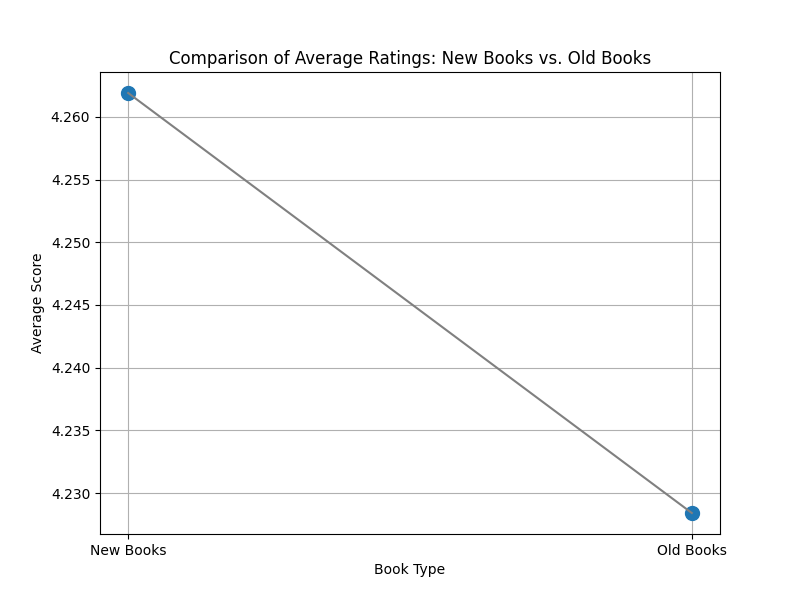

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_book_type_scores' is the Spark DataFrame containing the result of your SQL query
df_book_type_scores = spark.sql("""
SELECT CASE
         WHEN YEAR(B.PublishedDate) >= YEAR(CURDATE()) - 5 THEN 'New Books'
         ELSE 'Old Books'
       END as BookType,
       AVG(RR.Score) as AvgScore
FROM Books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY BookType
""")

# Convert the DataFrame to Pandas for visualization
pandas_book_type_scores = df_book_type_scores.toPandas()

# Sort the DataFrame for consistent plotting
pandas_book_type_scores.sort_values('BookType', inplace=True)

# Get the x locations for the groups
ind = np.arange(len(pandas_book_type_scores))

# Plotting
plt.figure(figsize=(8, 6))

# Plot the average score for each book type as a dot on the plot
plt.plot(ind, pandas_book_type_scores['AvgScore'], 'o', markersize=10)

# Add a line to connect the dots
plt.plot(ind, pandas_book_type_scores['AvgScore'], '-', color='gray')

# Set the x-axis to show the book types
plt.xticks(ind, pandas_book_type_scores['BookType'])

# Add labels and title
plt.xlabel('Book Type')
plt.ylabel('Average Score')
plt.title('Comparison of Average Ratings: New Books vs. Old Books')

# Add grid
plt.grid(True)

# Show the plot
plt.show()



%matplot plt


In [ ]:
# 4
# Top 10 Categories with the Highest Average NHelpfulReview

spark.sql("""
SELECT B.categories, AVG(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.categories
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|          categories|    NHelpfulReview|
+--------------------+------------------+
|['Music by women ...|              96.0|
|        ['Chimneys']|              96.0|
|['Firefly (Televi...|              85.5|
|  ['Diet, Reducing']|              73.0|
|        ['Flooring']|              59.0|
| ['Avian influenza']|             58.75|
|['Economic assist...|              48.0|
|['Satire, American']|              45.0|
|['Instructional s...|44.666666666666664|
|['Cookery (Stevia)']|              42.5|
+--------------------+------------------+

In [ ]:
# 5
# Top 10 Categories with the Highest Sum NHelpfulReview

spark.sql("""
SELECT B.categories, SUM(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.categories
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+
|          categories|NHelpfulReview|
+--------------------+--------------+
|         ['Fiction']|       1880384|
|        ['Religion']|        517201|
|         ['History']|        412754|
|['Biography & Aut...|        391334|
|['Juvenile Fiction']|        315930|
|['Business & Econ...|        291577|
|['Political Scien...|        168173|
|['Health & Fitness']|        163818|
|         ['Cooking']|        159376|
|['Body, Mind & Sp...|        146234|
+--------------------+--------------+

In [ ]:
# 6
# Sum NHelpfulReview by Author

spark.sql("""
SELECT authors, SUM(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.authors
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+
|             authors|NHelpfulReview|
+--------------------+--------------+
|     ['C. S. Lewis']|         67169|
|     ['Jane Austen']|         65720|
|['J. R. R. Tolkien']|         51364|
|      ['Adam Smith']|         39546|
| ['Charles Dickens']|         33593|
|  ['John Steinbeck']|         32584|
|     ['James Joyce']|         24696|
|   ['Kurt Vonnegut']|         24610|
|['Robert A. Heinl...|         23904|
|['Sharon L. Lecht...|         22648|
+--------------------+--------------+

In [ ]:
# 7
# Sum Score by Author

spark.sql("""
SELECT authors, SUM(RR.Score) as Score
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.authors
ORDER BY Score DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------+
|             authors|   Score|
+--------------------+--------+
|['J. R. R. Tolkien']|133057.0|
|     ['Jane Austen']|115277.0|
| ['Charles Dickens']| 63929.0|
|  ['John Steinbeck']| 53607.0|
|     ['C. S. Lewis']| 45201.0|
|   ['Kurt Vonnegut']| 42719.0|
|      ['Harper Lee']| 38172.0|
|['John Ronald Reu...| 36154.0|
|['F. Scott Fitzge...| 34797.0|
|   ['Lewis Carroll']| 31745.0|
+--------------------+--------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

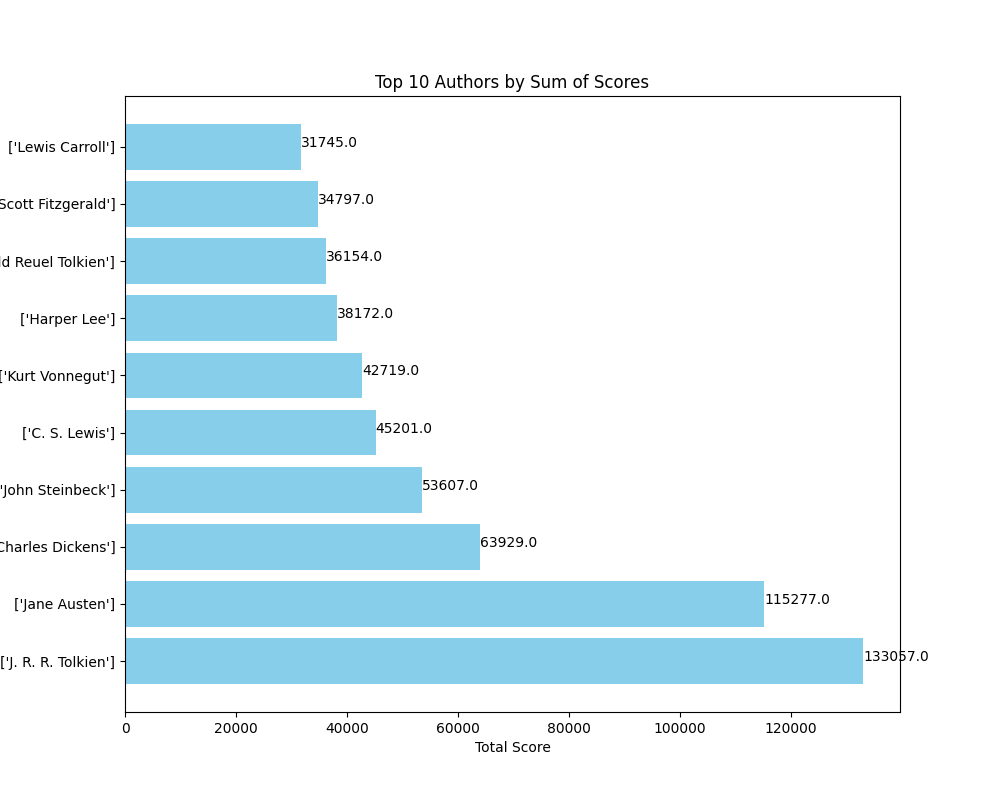

In [ ]:
import matplotlib.pyplot as plt

# This code assumes that the DataFrame 'df_author_scores' contains the result of your SQL query
# Let's say you've run your SQL query and stored the result in 'df_author_scores'
df_author_scores = spark.sql("""
SELECT authors, SUM(RR.Score) as Score
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.authors
ORDER BY Score DESC
LIMIT 10
""")

# Convert the DataFrame to Pandas for visualization
pandas_author_scores = df_author_scores.toPandas()

# Sorting the DataFrame by 'Score' for better visualization
pandas_author_scores.sort_values('Score', inplace=True, ascending=True)

# Plotting
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
plt.barh(pandas_author_scores['authors'], pandas_author_scores['Score'], color='skyblue')

# Add labels and title
plt.xlabel('Total Score')
plt.ylabel('Authors')
plt.title('Top 10 Authors by Sum of Scores')

# Inverting the y-axis to have the highest score at the top
plt.gca().invert_yaxis()

# Optionally, add the data labels on the bars
for index, value in enumerate(pandas_author_scores['Score']):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

%matplot plt

In [ ]:
# 8
# Average NHelpfulReview by Author

spark.sql("""
SELECT authors, AVG(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.authors
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|             authors|    NHelpfulReview|
+--------------------+------------------+
|['James D. Hart',...|             194.0|
|['Jacques Galinie...|174.11764705882354|
|['Andrew David Na...|             145.0|
|['Jim Bauer', 'Sc...|             132.0|
|   ['Richard Perez']|           112.875|
|    ['Eileen Logan']|             110.0|
|['Richard Martin ...|             102.0|
|['William H. Fris...|101.45454545454545|
|['Susan Dickens',...|              97.0|
|['Pamela Youngdah...|              96.0|
+--------------------+------------------+

In [ ]:
# 9
# Top 10 Books(Title) with the Highest Average NHelpfulReview

spark.sql("""
SELECT B.Title, AVG(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Title
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|               Title|    NHelpfulReview|
+--------------------+------------------+
|Through the Stone...|             194.0|
|     The Lazarus Pit|             189.0|
|Quines Son Los Do...|174.11764705882354|
|Zondervan NIV Stu...|             145.0|
|Deck planner: 25 ...|             132.0|
|A practical Sansk...|             123.0|
|The Losers Club: ...|           112.875|
|How To Grow Organ...|             110.0|
|School Nurse's Su...|             102.0|
|Good People Beget...|101.45454545454545|
+--------------------+------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

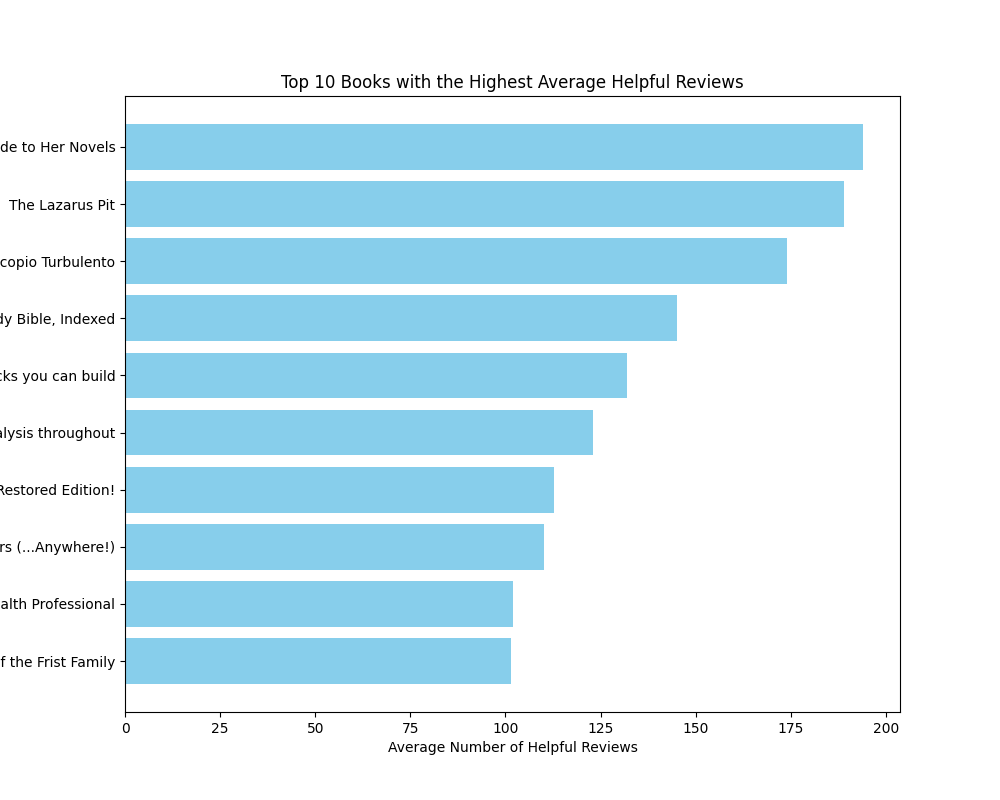

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_top_books' is the Spark DataFrame containing the result of your SQL query
df_top_books = spark.sql("""
SELECT B.Title, AVG(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Title
ORDER BY NHelpfulReview DESC
LIMIT 10
""")

# Convert the DataFrame to Pandas for visualization
pandas_top_books = df_top_books.toPandas()

# Sorting the DataFrame by 'NHelpfulReview' for better visualization
pandas_top_books.sort_values('NHelpfulReview', inplace=True, ascending=True)

# Plotting
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
plt.barh(pandas_top_books['Title'], pandas_top_books['NHelpfulReview'], color='skyblue')

# Add labels and title
plt.xlabel('Average Number of Helpful Reviews')
plt.ylabel('Book Title')
plt.title('Top 10 Books with the Highest Average Helpful Reviews')

# Show the plot
plt.show()
%matplot plt


In [ ]:
# 10
# Top 10 Books(Title) with the Highest Sum Score

spark.sql("""
SELECT B.Title, SUM(RR.Score) as Score
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Title
ORDER BY Score DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+
|               Title|  Score|
+--------------------+-------+
|          The Hobbit|85040.0|
| Pride and Prejudice|81125.0|
|   Mere Christianity|24826.0|
|  Great Expectations|23557.0|
|     Brave New World|21573.0|
|    The Great Gatsby|17844.0|
|Harry Potter and ...|17490.0|
|The Hobbit There ...|17177.0|
|The Hobbitt, or t...|17098.0|
|The Hobbit or The...|16862.0|
+--------------------+-------+

In [ ]:
# 11
# Top 10 Publisher with by RatingsCount

spark.sql("""
SELECT Publisher, SUM(RatingsCount) as RatingsCount
FROM books
GROUP BY Publisher
ORDER BY RatingsCount DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|           Publisher|RatingsCount|
+--------------------+------------+
|             Penguin|       77862|
|        Random House|       48596|
|  Simon and Schuster|       48477|
|      Harper Collins|       47901|
|             Vintage|       32985|
|Knopf Books for Y...|       26910|
|           Macmillan|       16524|
|         Hachette UK|       15145|
|      Vintage Canada|       14111|
|              Bantam|       13876|
+--------------------+------------+

In [ ]:
# 12
# Top 10 Publisher with by NHelpfulReview

spark.sql("""
SELECT B.Publisher, SUM(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Publisher
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------+
|          Publisher|NHelpfulReview|
+-------------------+--------------+
|            Penguin|        389211|
| Simon and Schuster|        374548|
|     Harper Collins|        258886|
|            Vintage|        153702|
|       Random House|        132079|
|  John Wiley & Sons|        106292|
|Courier Corporation|        103254|
|          Macmillan|         99950|
|         Penguin UK|         93012|
|        Hachette UK|         77359|
+-------------------+--------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

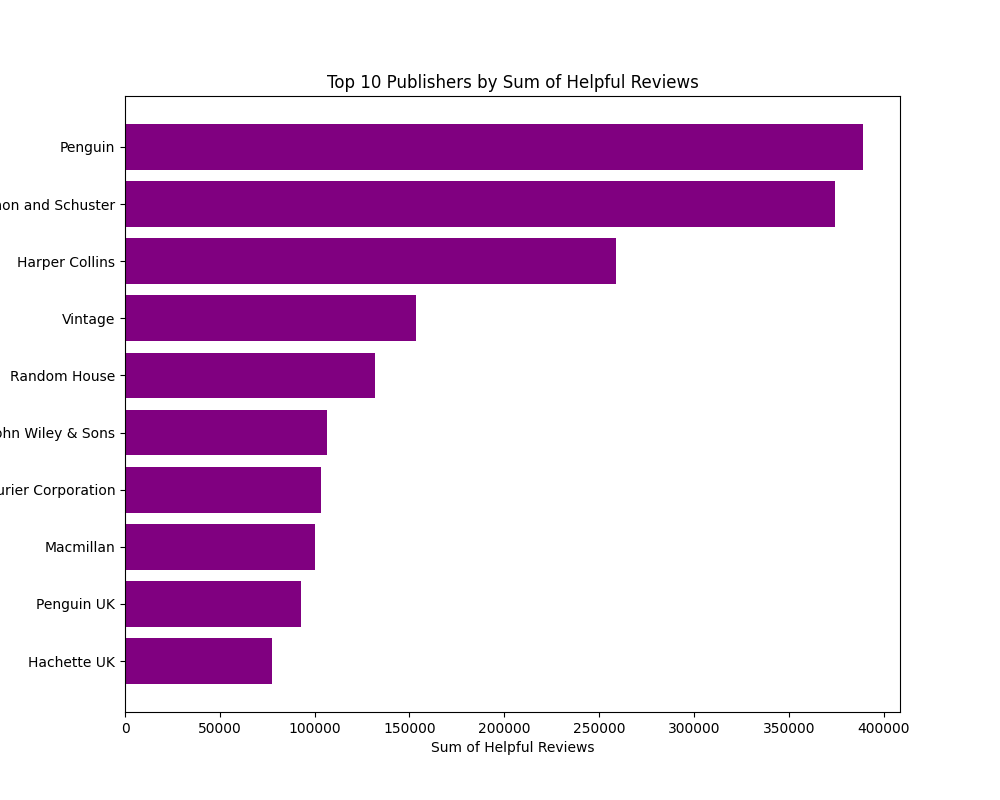

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_top_publishers' is the Spark DataFrame containing the result of your SQL query
df_top_publishers = spark.sql("""
SELECT B.Publisher, SUM(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Publisher
ORDER BY NHelpfulReview DESC
LIMIT 10
""")

# Convert the DataFrame to Pandas for visualization
pandas_top_publishers = df_top_publishers.toPandas()

# Sorting the DataFrame by 'NHelpfulReview' for better visualization
pandas_top_publishers.sort_values('NHelpfulReview', inplace=True, ascending=True)

# Plotting
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
plt.barh(pandas_top_publishers['Publisher'], pandas_top_publishers['NHelpfulReview'], color='purple')

# Add labels and title
plt.xlabel('Sum of Helpful Reviews')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Sum of Helpful Reviews')

# Show the plot
plt.show()
%matplot plt


In [ ]:
# 13
# Top 10 Publisher with by Average NHelpfulReview

spark.sql("""
SELECT B.Publisher, AVG(RR.NHelpfulReview) as NHelpfulReview
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Publisher
ORDER BY NHelpfulReview DESC
LIMIT 10
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|           Publisher|   NHelpfulReview|
+--------------------+-----------------+
|Masonry Inst of Amer|             96.0|
|       Robert Najemy|70.23076923076923|
|        Sean F Kelly|             58.0|
|     EnCognitive.com|            52.62|
|         S L G Books|             48.0|
|Scott Foresman Trade|46.44444444444444|
|         Copp, Clark|           42.375|
|St. Paul, Minn., ...|41.86666666666667|
|     Watermark Press|             41.0|
|Amer West Pub & Dist|40.63636363636363|
+--------------------+-----------------+

In [ ]:
# 14
# Top 10 Publisher with by Score

spark.sql("""
SELECT B.Publisher, SUM(RR.Score) as Score
FROM books B
JOIN reviews_rating RR ON B.Title = RR.Title
GROUP BY B.Publisher
ORDER BY Score DESC
LIMIT 10
""").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------+
|           Publisher|   Score|
+--------------------+--------+
|             Penguin|376793.0|
|  Simon and Schuster|329749.0|
|      Harper Collins|237009.0|
|        Random House|148080.0|
| Courier Corporation|126198.0|
|             Vintage|108821.0|
|       Mariner Books|105728.0|
|          Penguin UK| 87189.0|
|Houghton Mifflin ...| 86044.0|
|           Macmillan| 81968.0|
+--------------------+--------+